In [1]:
import numpy as np, matplotlib.pyplot as plt

In [2]:
plt.xkcd();

In [54]:
x = np.linspace(-2,3.5)
y = np.linspace(-2,2.5)
X,Y = np.meshgrid(x,y)

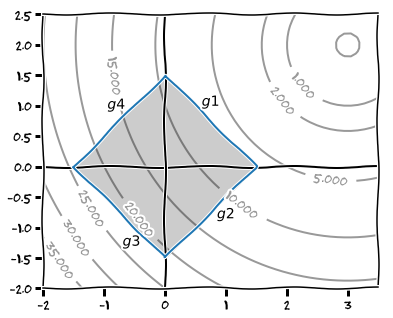

In [57]:
plt.figure(figsize=(6,6))
plt.axes(aspect='equal')
plt.axhline(color='k')
plt.axvline(color='k')
plt.xlim(-2,3.5)
plt.ylim(-2,2.5)
plt.plot([-3/2, 0, 3/2, 0, -3/2],[0,3/2,0,-3/2, 0])
plt.fill_between([ -1.5,    0,  1.5],
                [    0, -1.5,    0],
                [    0,  1.5,    0],
                color='.8')
CS = plt.contour(X,Y,(X-3)**2+(Y-2)**2, colors='k', alpha=0.4,
                levels = [0.04,1,2,5,10,15,20,25,30,35])
plt.clabel(CS)
plt.text(0.6,1,'$g1$')
plt.text(0.85,-0.85,'$g2$')
plt.text(-0.7,-1.3,'$g3$')
plt.text(-0.95,0.95,'$g4$')
plt.title()
plt.show()